# 2D Unet for Biomedical Image Segmentation

## Python Imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 
from train import *
from data_loader import * 

from scipy import ndimage

from matplotlib.colors import ListedColormap



##  Data Loading and Augmentation

training image from batch 0


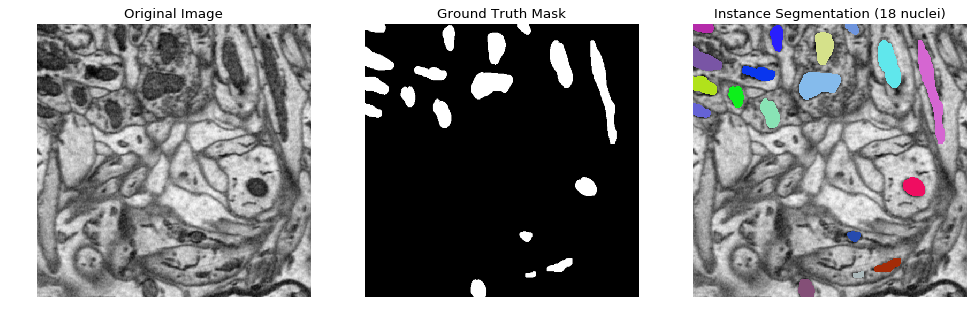

training image from batch 1


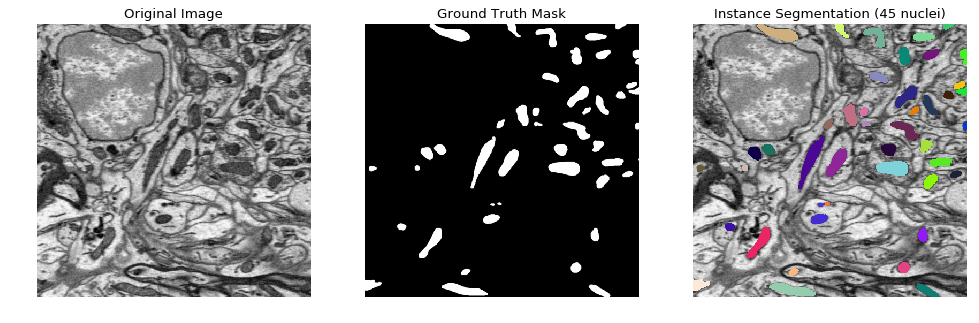

training image from batch 2


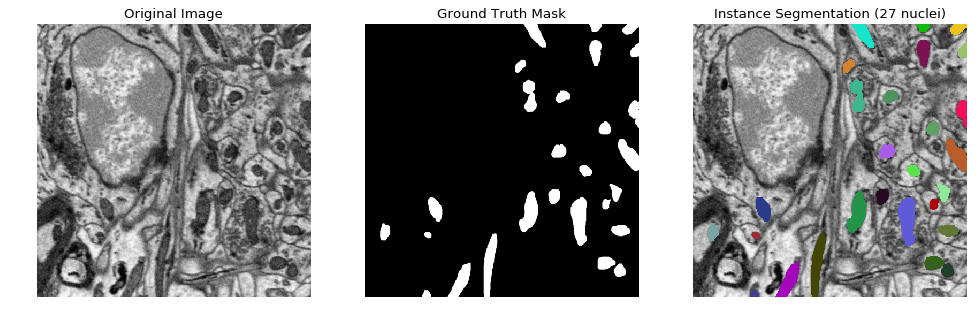

training image from batch 3


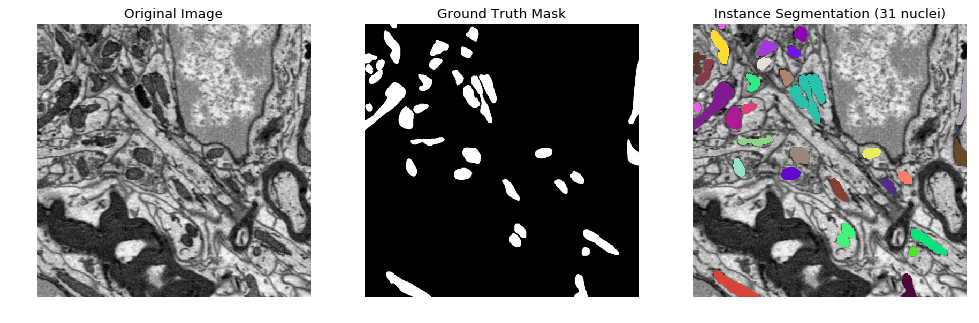

In [2]:
img_resize = 512
batch_size = 6

# traning set
data_dir = './datasets/mitochondria/training/images/'
label_dir = './datasets/mitochondria/training/labels/'
MitoDataset = EM_Dataset(data_dir, label_dir, img_resize)
MitoDataLoader = DataLoader(MitoDataset,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=4)

# validation set 
val_data_dir = './datasets/mitochondria/validation/images/'
val_label_dir = './datasets/mitochondria/validation/labels/'
MitoValDataset = EM_Dataset(val_data_dir, val_label_dir, img_resize, do_transform=False)
MitoValDataLoader = DataLoader(MitoValDataset,
                             batch_size=1,
                             shuffle=True,
                             num_workers=4)



for i, data in enumerate(MitoDataLoader):

        print("training image from batch %d" % i)

        imgs = data[0]
        labels = data[1]

        mask, nlabels = ndimage.label(labels[0])
        
        rand_cmap = ListedColormap(np.random.rand(256,3))

        labels_for_display = np.where(mask > 0, mask, np.nan)


        f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True,figsize=(15,5), dpi=80)

        ax1.imshow(np.squeeze(imgs[0]), cmap="gray")
        ax1.set_title("Original Image")
        ax1.axis('off')
        
        ax2.imshow(np.squeeze(labels[0]), cmap="gray")
        ax2.set_title("Ground Truth Mask")
        ax2.axis('off')
        
        ax3.imshow(np.squeeze(imgs[0]), cmap='gray')
        ax3.imshow(np.squeeze(labels_for_display), cmap=rand_cmap)
        ax3.set_title("Instance Segmentation (%d nuclei)"% nlabels)
        ax3.axis('off')
        

        plt.show()
       


GPU is enabled 


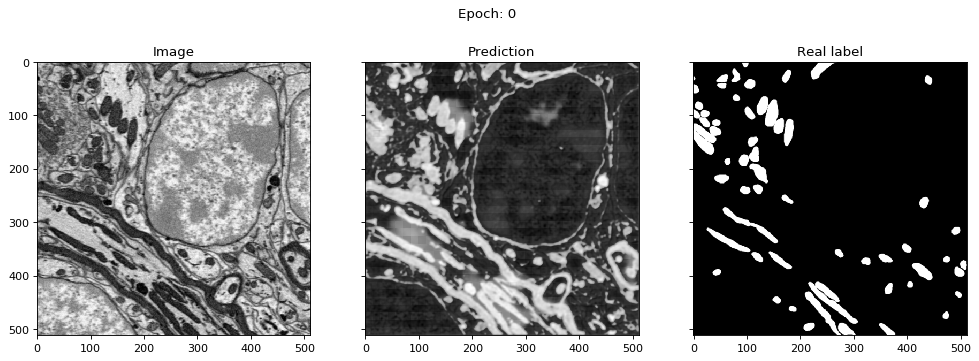

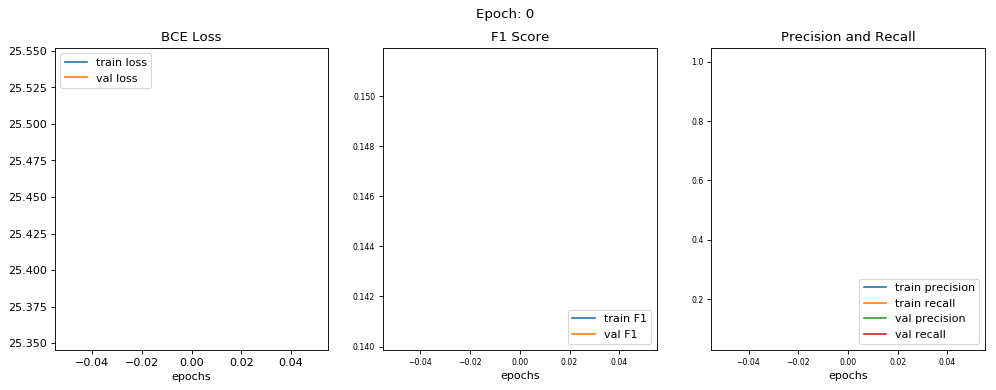

epoch [0/500] 
train loss = 25.3548, train f1 score = 0.1514 
train precision = 0.0823, train recall = 1.0000 

val loss = 25.5428, val f1 score = 0.1404 
val precision = 0.0755, val recall = 1.0000 




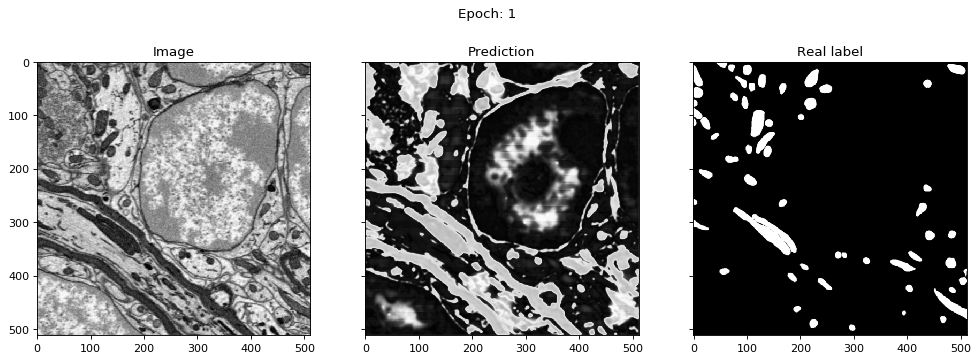

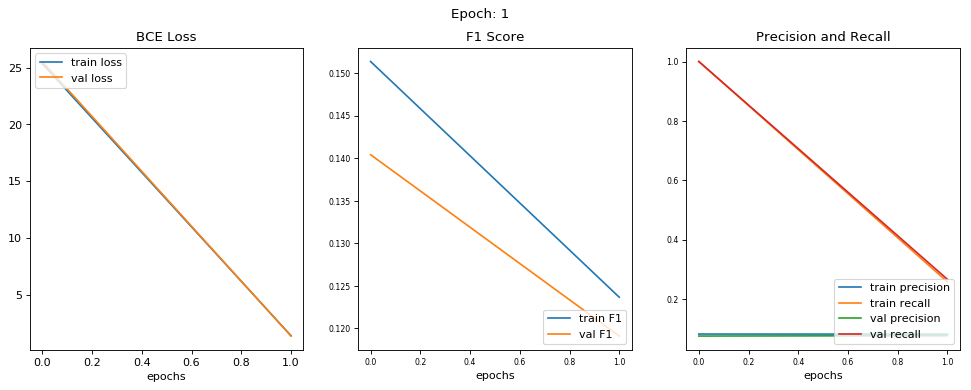

epoch [1/500] 
train loss = 1.3688, train f1 score = 0.1237 
train precision = 0.0821, train recall = 0.2579 

val loss = 1.3389, val f1 score = 0.1191 
val precision = 0.0768, val recall = 0.2664 




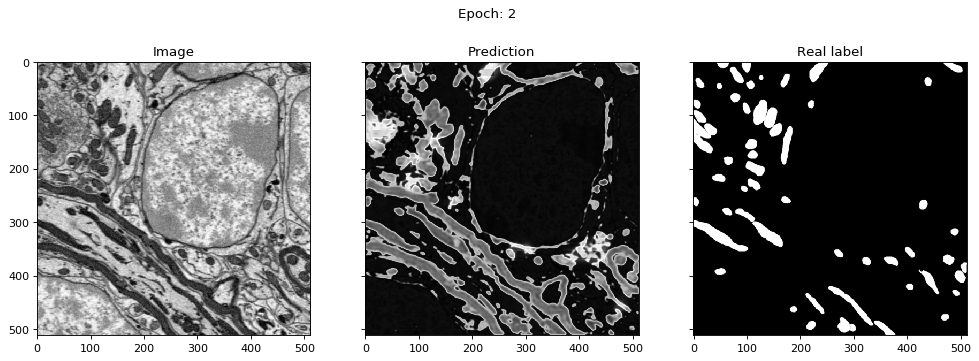

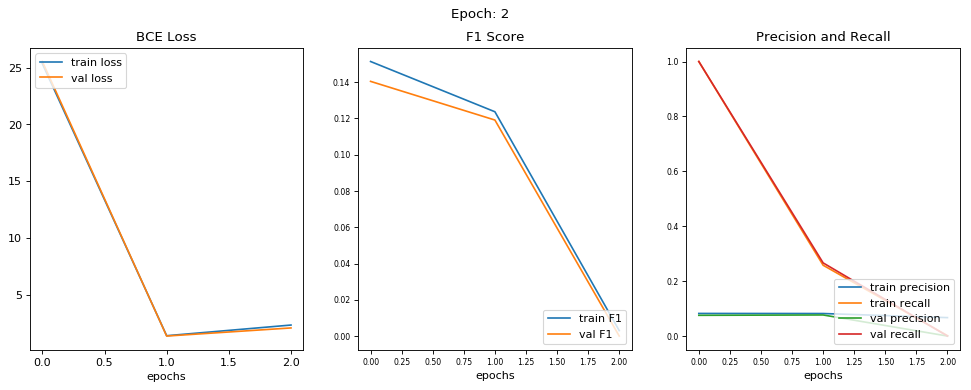

epoch [2/500] 
train loss = 2.3092, train f1 score = 0.0030 
train precision = 0.0671, train recall = 0.0016 

val loss = 2.0541, val f1 score = 0.0000 
val precision = 0.0000, val recall = 0.0000 




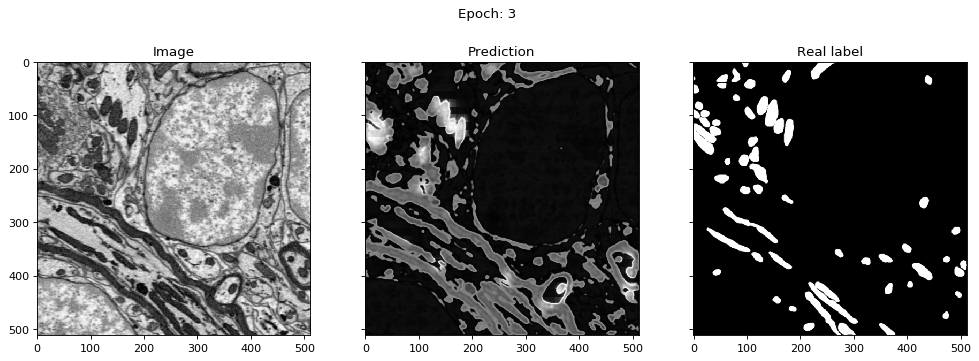

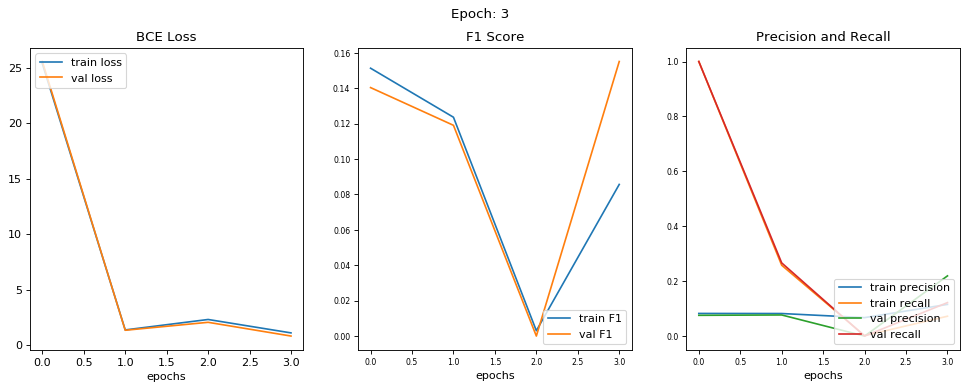

epoch [3/500] 
train loss = 1.1013, train f1 score = 0.0857 
train precision = 0.1153, train recall = 0.0722 

val loss = 0.8169, val f1 score = 0.1552 
val precision = 0.2191, val recall = 0.1218 




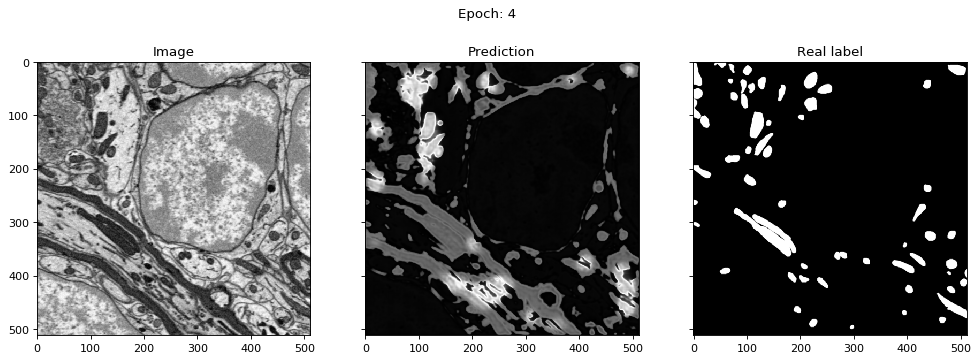

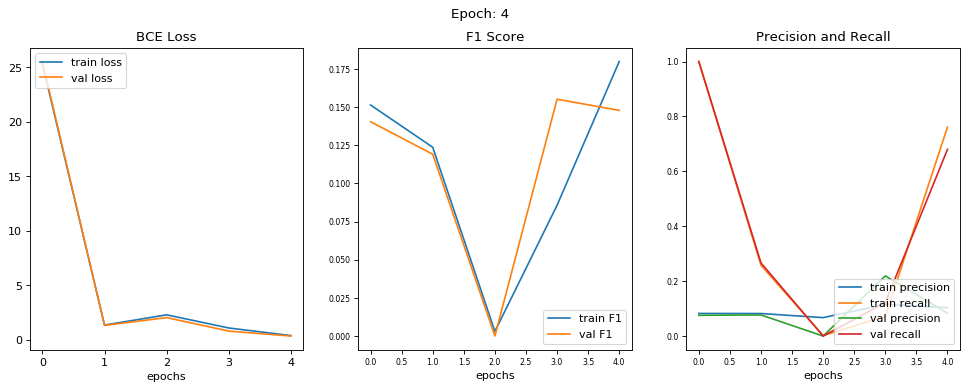

epoch [4/500] 
train loss = 0.4043, train f1 score = 0.1799 
train precision = 0.1034, train recall = 0.7610 

val loss = 0.3623, val f1 score = 0.1478 
val precision = 0.0831, val recall = 0.6799 




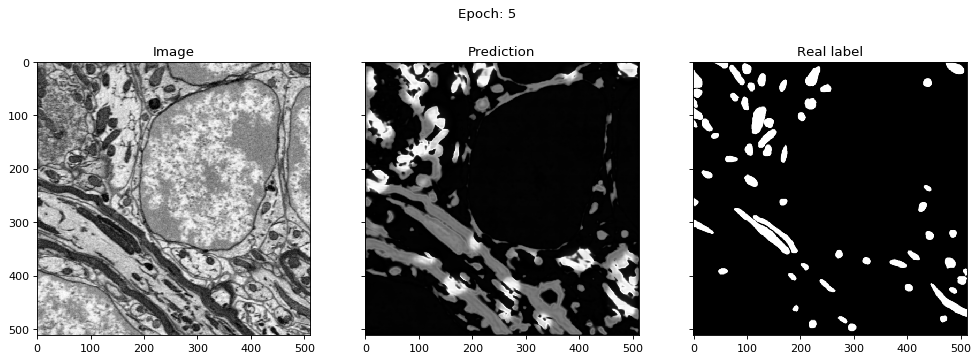

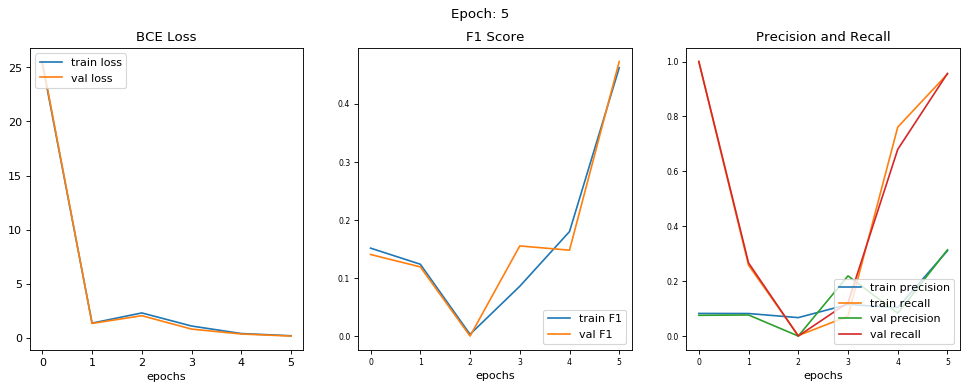

epoch [5/500] 
train loss = 0.1995, train f1 score = 0.4621 
train precision = 0.3108, train recall = 0.9544 

val loss = 0.1732, val f1 score = 0.4727 
val precision = 0.3141, val recall = 0.9566 




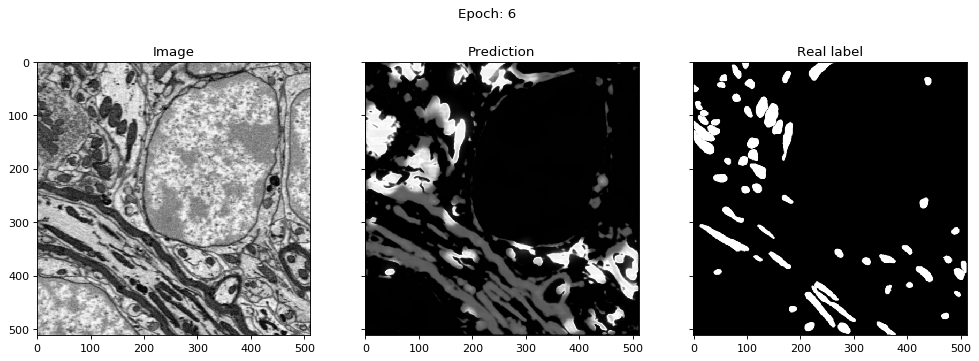

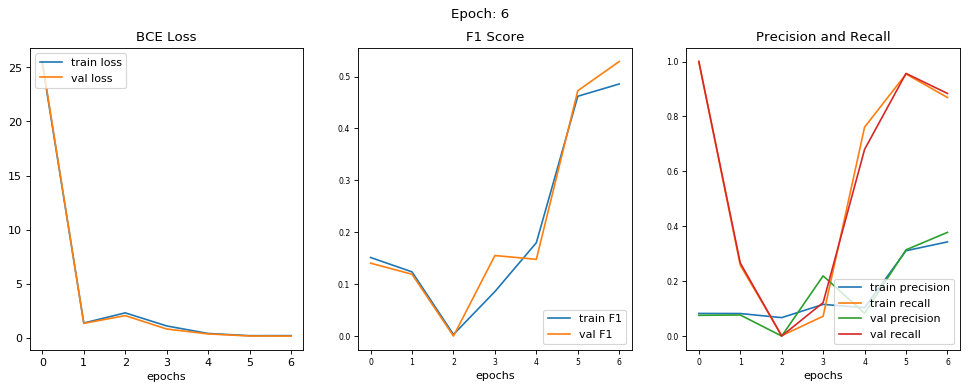

epoch [6/500] 
train loss = 0.2050, train f1 score = 0.4857 
train precision = 0.3429, train recall = 0.8690 

val loss = 0.1658, val f1 score = 0.5290 
val precision = 0.3776, val recall = 0.8836 




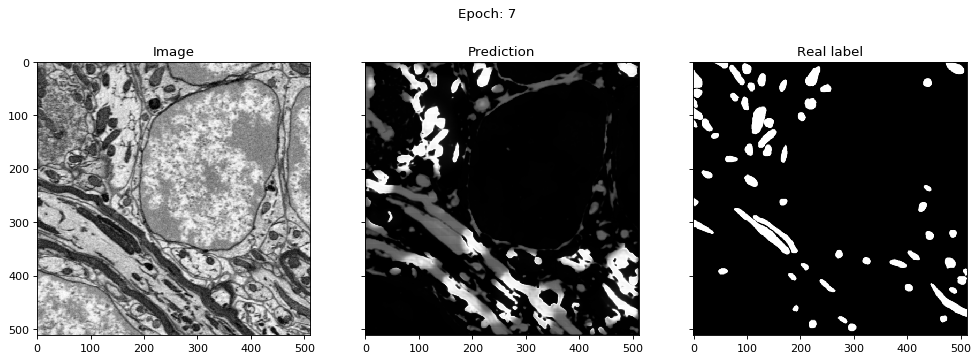

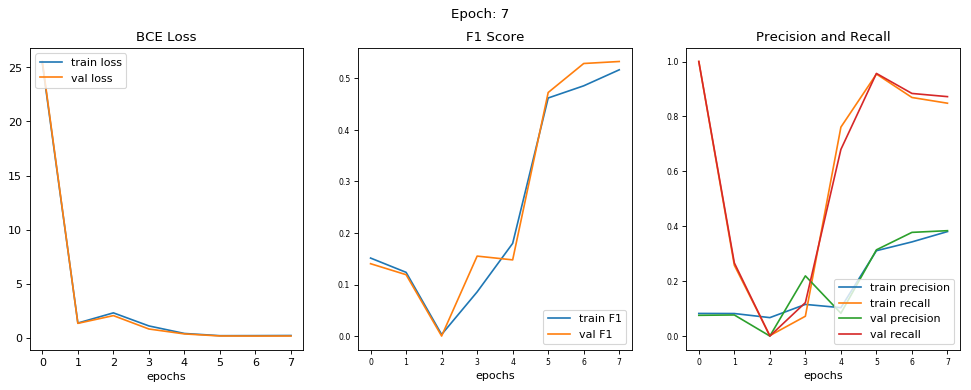

epoch [7/500] 
train loss = 0.2156, train f1 score = 0.5167 
train precision = 0.3805, train recall = 0.8481 

val loss = 0.1704, val f1 score = 0.5329 
val precision = 0.3838, val recall = 0.8720 




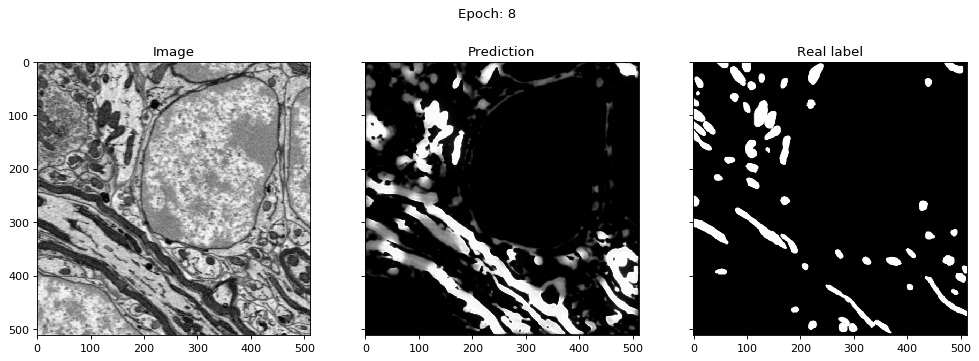

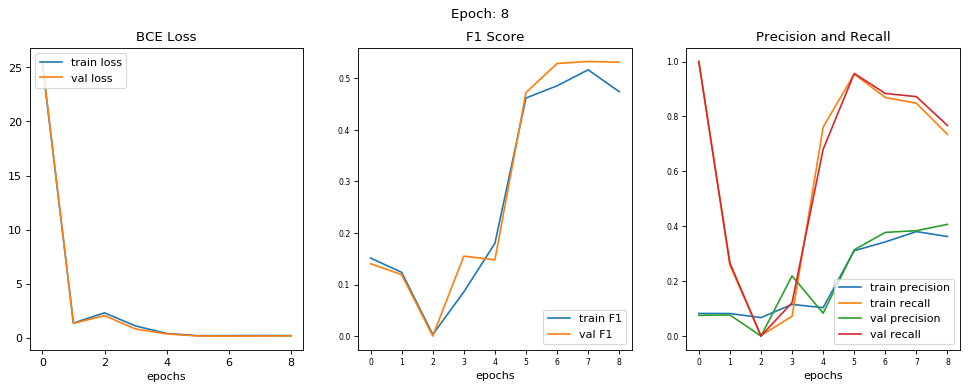

epoch [8/500] 
train loss = 0.2074, train f1 score = 0.4743 
train precision = 0.3625, train recall = 0.7344 

val loss = 0.1838, val f1 score = 0.5314 
val precision = 0.4068, val recall = 0.7668 




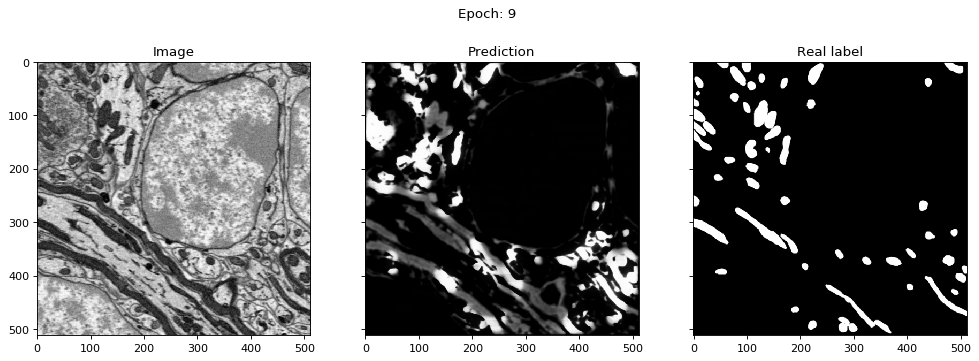

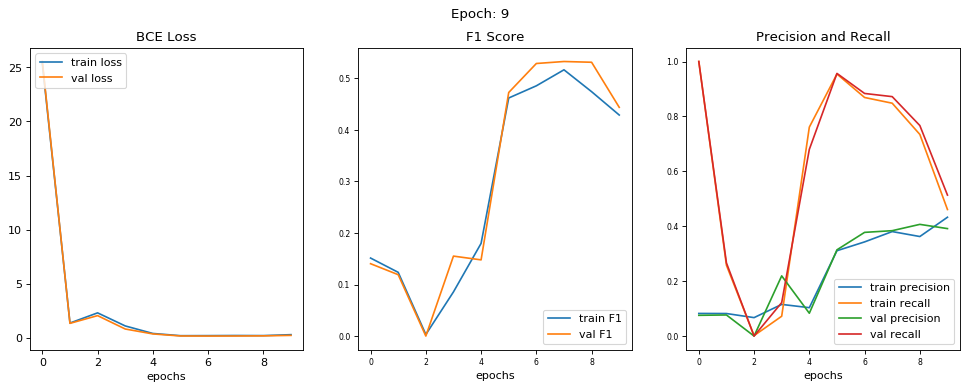

epoch [9/500] 
train loss = 0.2935, train f1 score = 0.4290 
train precision = 0.4328, train recall = 0.4609 

val loss = 0.2281, val f1 score = 0.4439 
val precision = 0.3914, val recall = 0.5135 




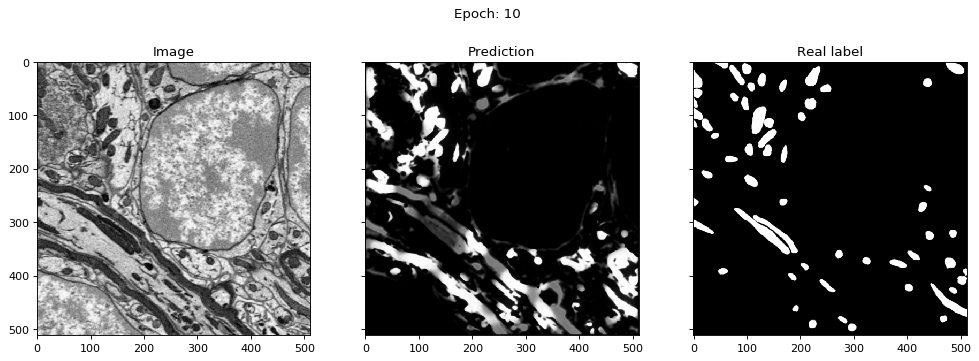

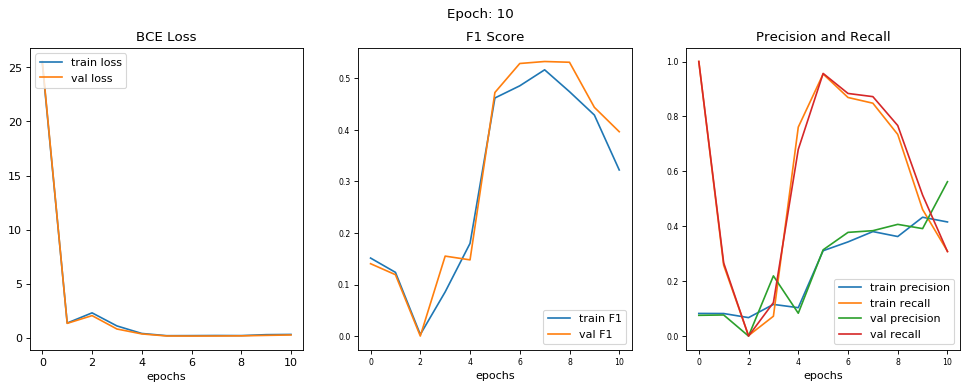

epoch [10/500] 
train loss = 0.3139, train f1 score = 0.3223 
train precision = 0.4156, train recall = 0.3087 

val loss = 0.2659, val f1 score = 0.3966 
val precision = 0.5622, val recall = 0.3076 




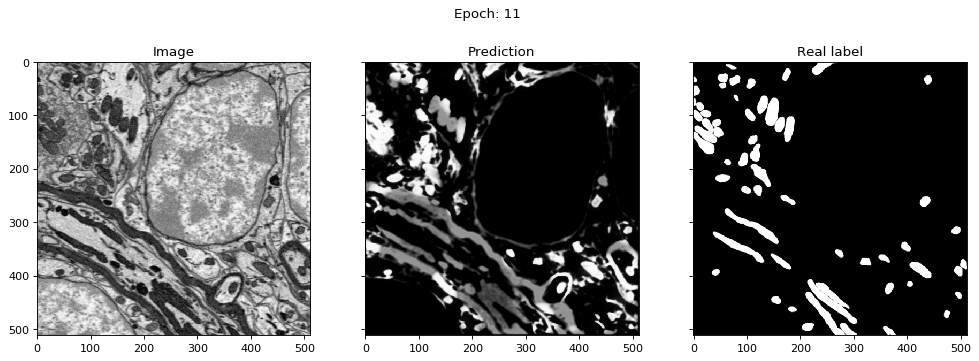

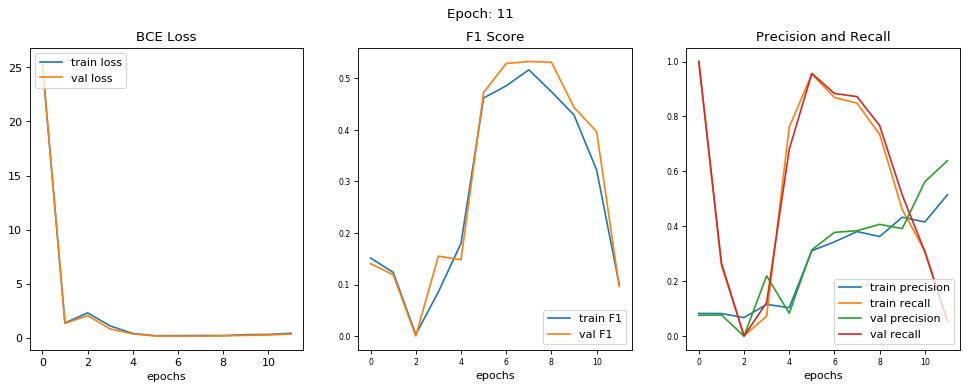

epoch [11/500] 
train loss = 0.4254, train f1 score = 0.0993 
train precision = 0.5148, train recall = 0.0565 

val loss = 0.3457, val f1 score = 0.0961 
val precision = 0.6387, val recall = 0.0525 




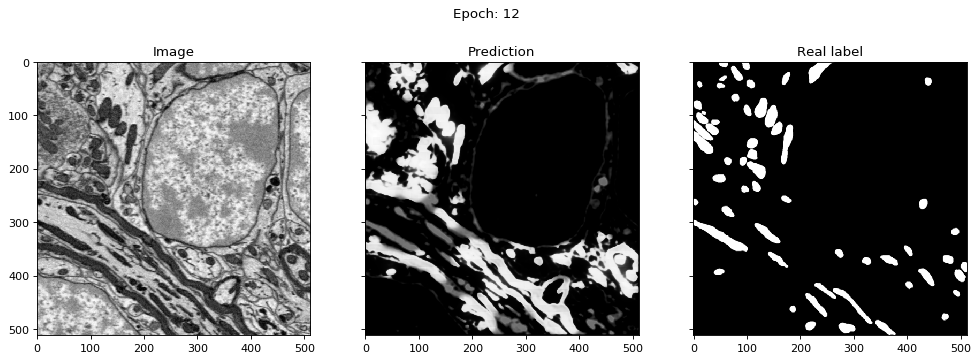

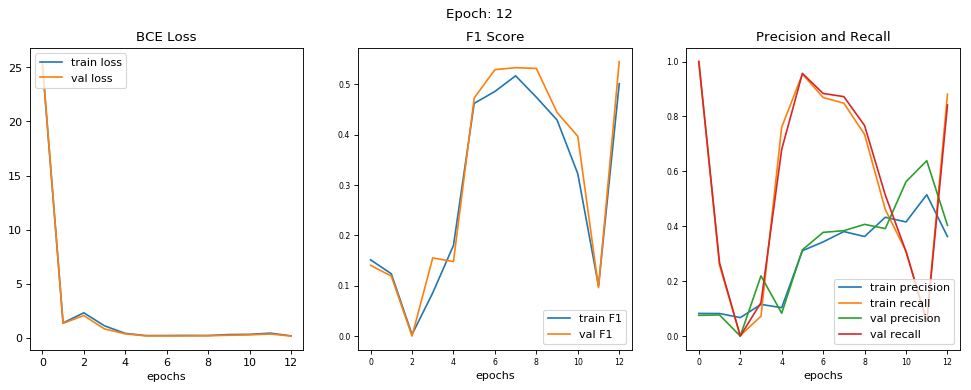

epoch [12/500] 
train loss = 0.1734, train f1 score = 0.5010 
train precision = 0.3624, train recall = 0.8808 

val loss = 0.1579, val f1 score = 0.5452 
val precision = 0.4033, val recall = 0.8416 




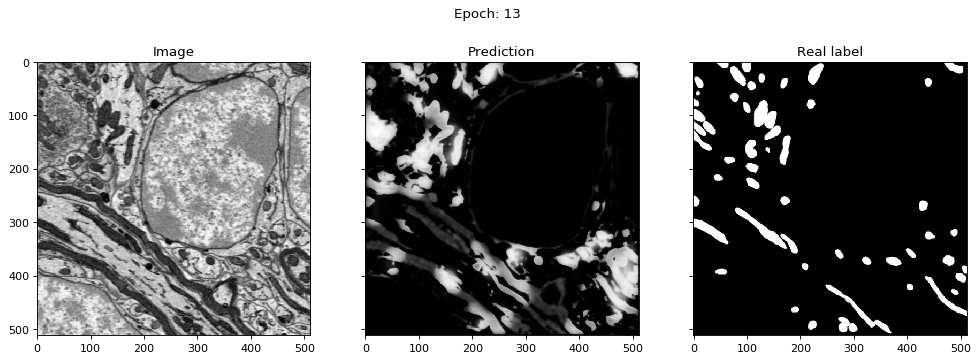

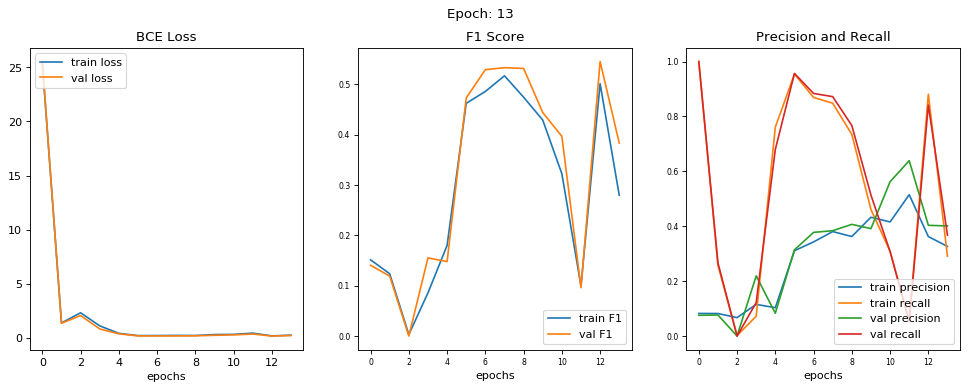

epoch [13/500] 
train loss = 0.2389, train f1 score = 0.2796 
train precision = 0.3264, train recall = 0.2908 

val loss = 0.2043, val f1 score = 0.3833 
val precision = 0.4010, val recall = 0.3677 




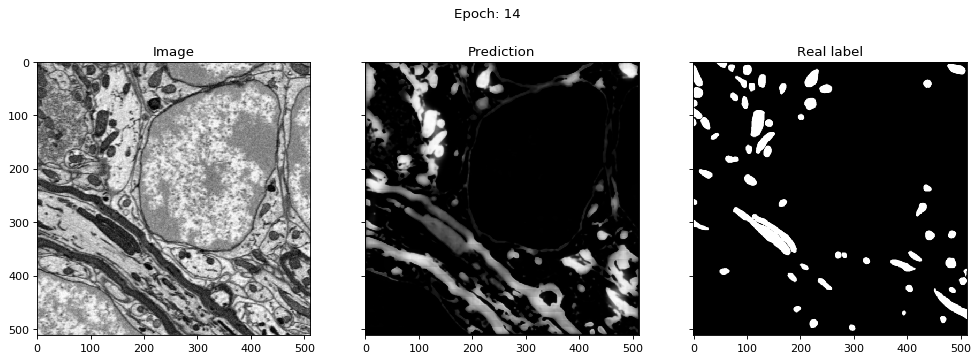

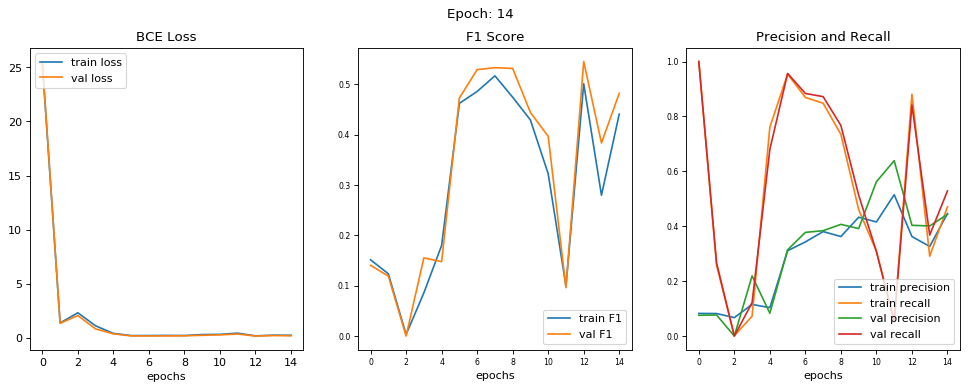

epoch [14/500] 
train loss = 0.2294, train f1 score = 0.4406 
train precision = 0.4463, train recall = 0.4708 

val loss = 0.1870, val f1 score = 0.4821 
val precision = 0.4433, val recall = 0.5287 




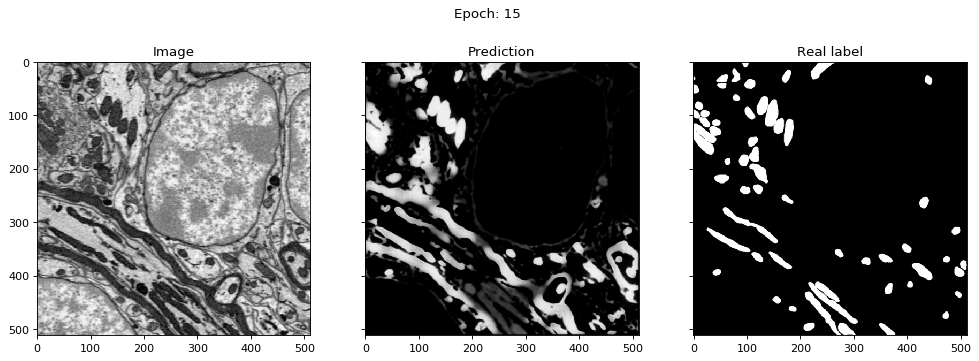

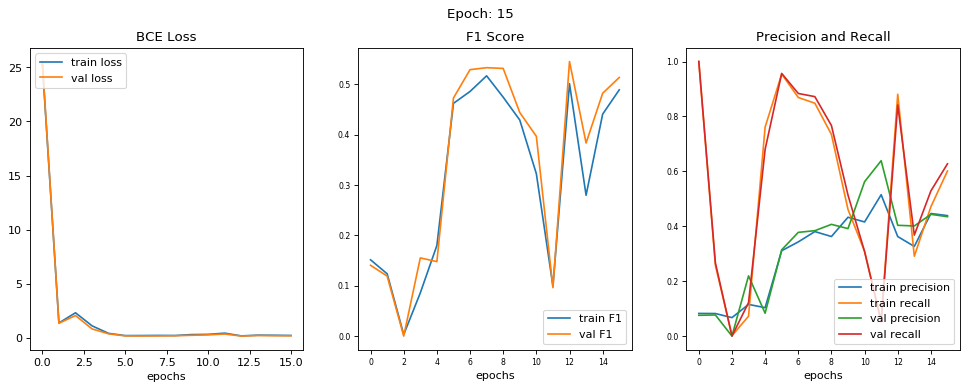

epoch [15/500] 
train loss = 0.2114, train f1 score = 0.4888 
train precision = 0.4386, train recall = 0.6012 

val loss = 0.1824, val f1 score = 0.5134 
val precision = 0.4348, val recall = 0.6273 




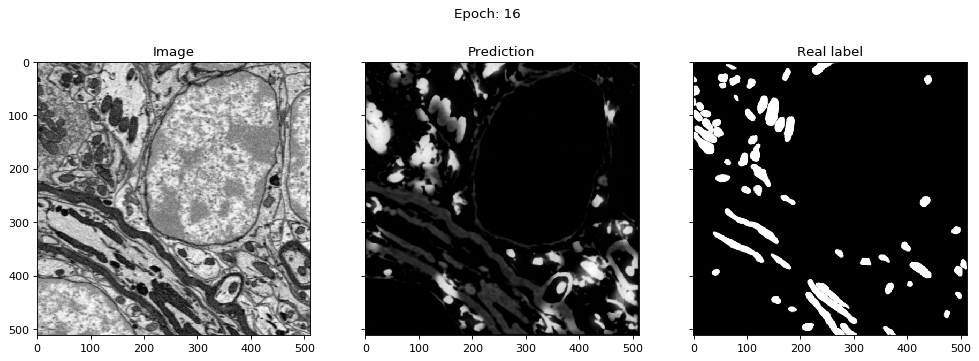

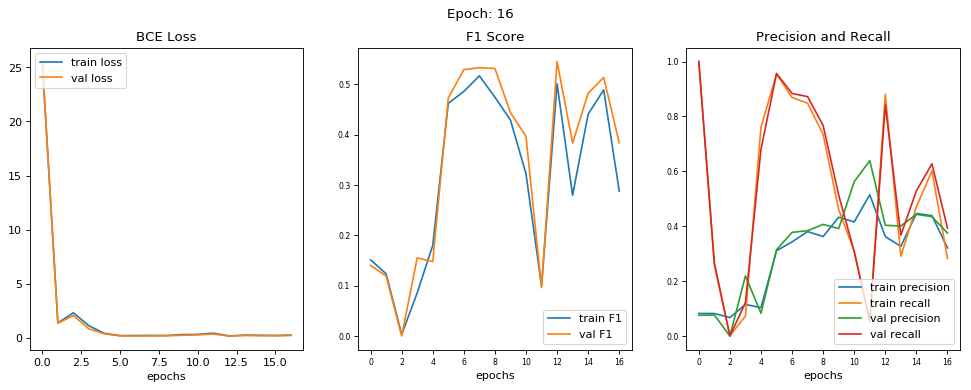

epoch [16/500] 
train loss = 0.2440, train f1 score = 0.2876 
train precision = 0.3210, train recall = 0.2824 

val loss = 0.2082, val f1 score = 0.3837 
val precision = 0.3751, val recall = 0.3933 




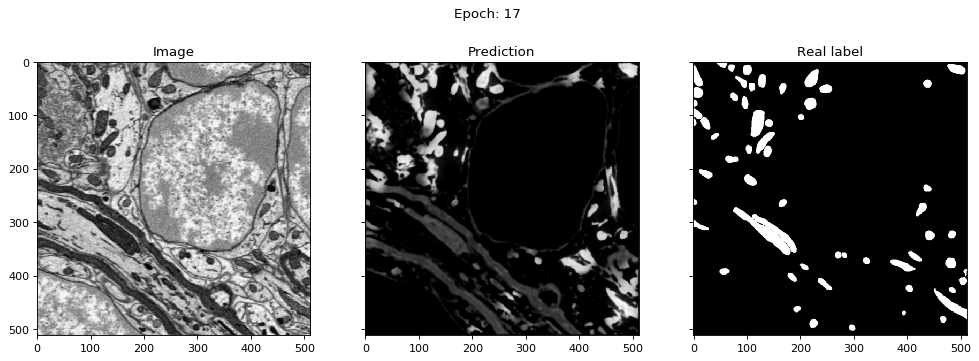

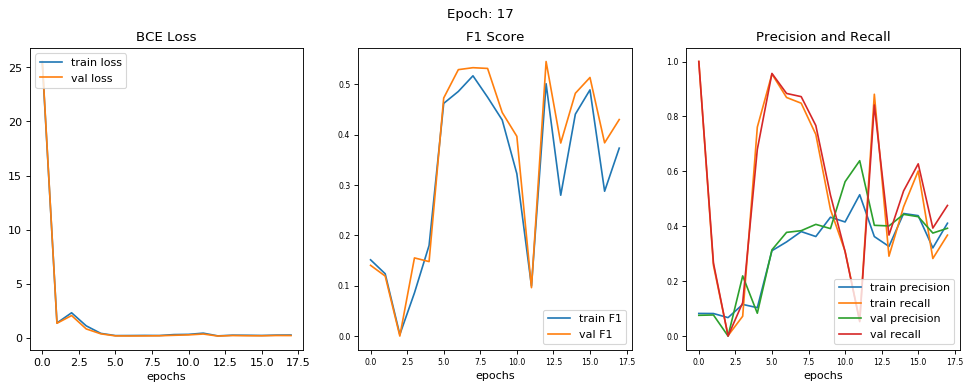

epoch [17/500] 
train loss = 0.2494, train f1 score = 0.3731 
train precision = 0.4109, train recall = 0.3676 

val loss = 0.2041, val f1 score = 0.4299 
val precision = 0.3926, val recall = 0.4757 




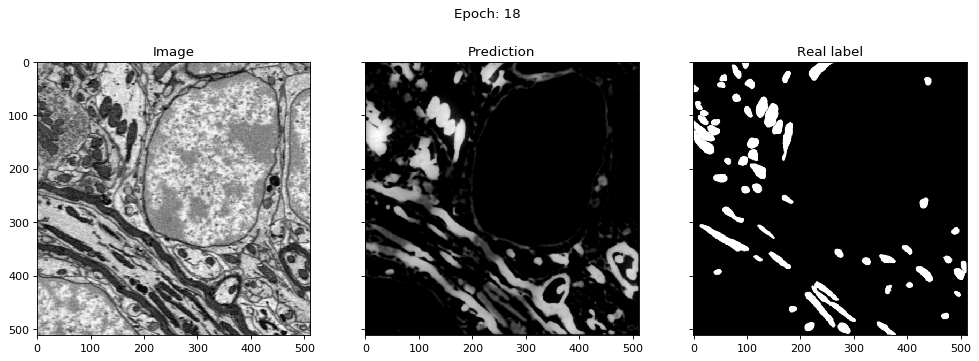

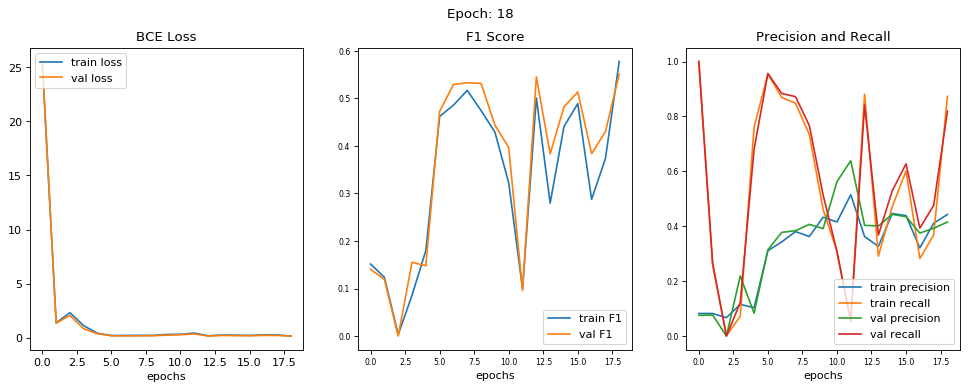

epoch [18/500] 
train loss = 0.1559, train f1 score = 0.5775 
train precision = 0.4429, train recall = 0.8734 

val loss = 0.1498, val f1 score = 0.5509 
val precision = 0.4153, val recall = 0.8190 




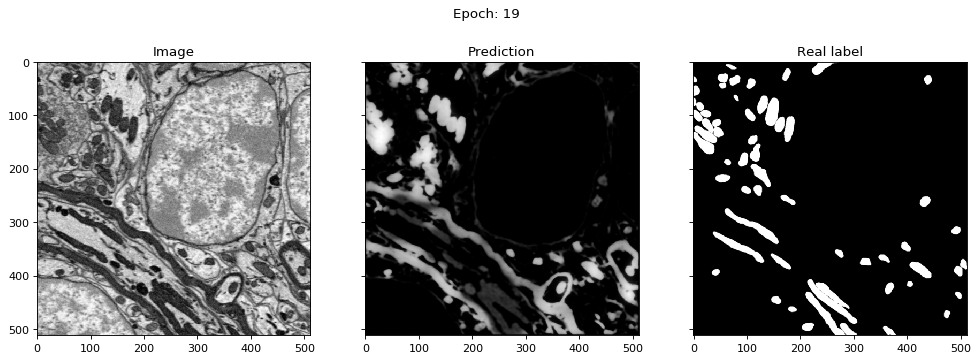

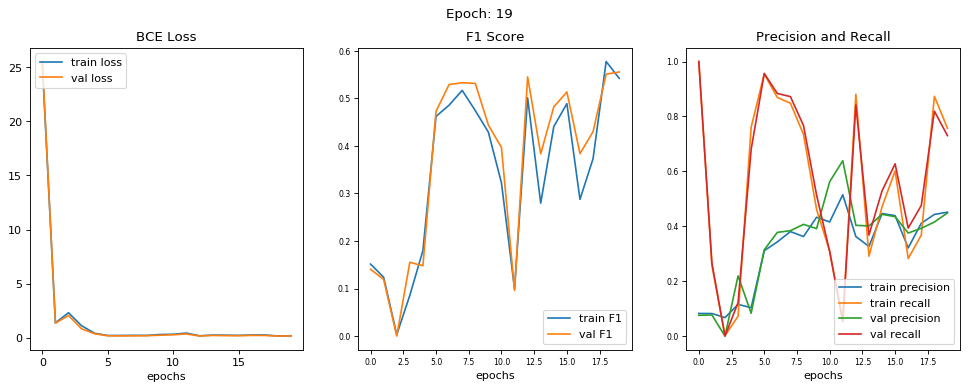

epoch [19/500] 
train loss = 0.1654, train f1 score = 0.5421 
train precision = 0.4513, train recall = 0.7569 

val loss = 0.1616, val f1 score = 0.5555 
val precision = 0.4485, val recall = 0.7301 




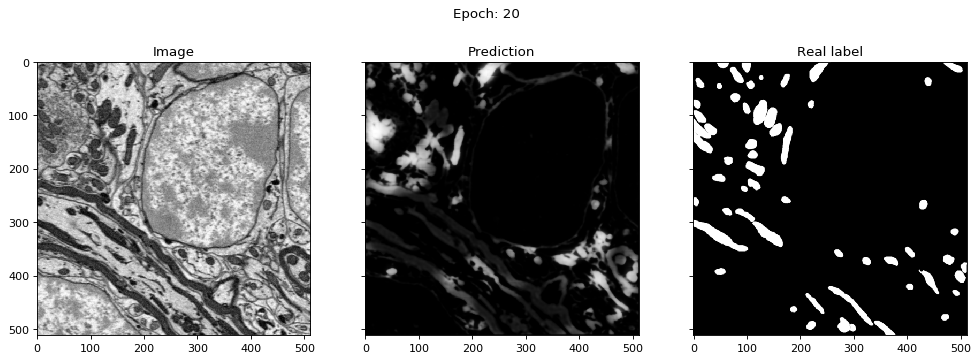

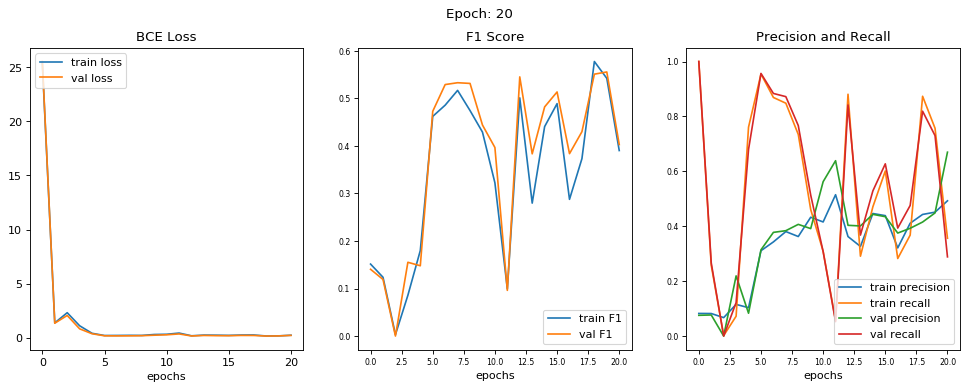

epoch [20/500] 
train loss = 0.2253, train f1 score = 0.3902 
train precision = 0.4926, train recall = 0.3562 

val loss = 0.2129, val f1 score = 0.4029 
val precision = 0.6697, val recall = 0.2884 




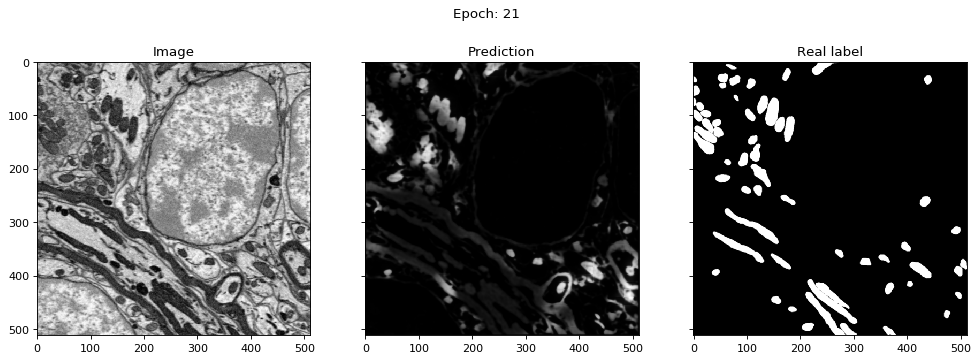

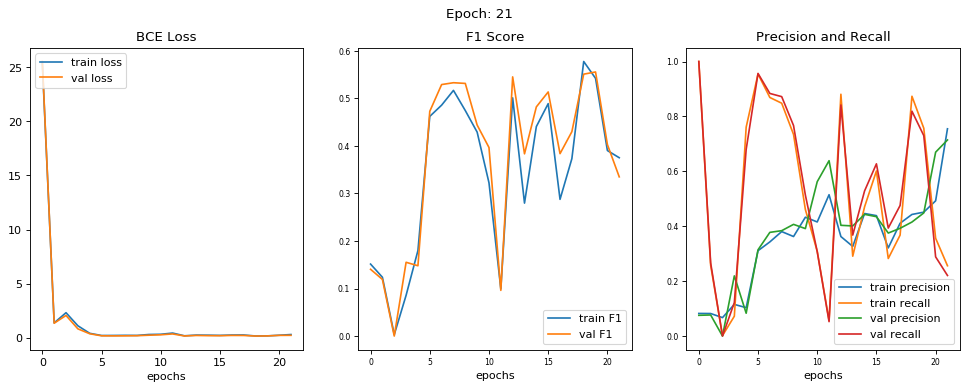

epoch [21/500] 
train loss = 0.2901, train f1 score = 0.3751 
train precision = 0.7549, train recall = 0.2561 

val loss = 0.2178, val f1 score = 0.3349 
val precision = 0.7142, val recall = 0.2206 




KeyboardInterrupt: 

In [3]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))


n_epochs = 500

# unet(n_channels, n_classes, n_filters_start=64 )
un = unet(1,1)
if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()

output_dir = "./2D_Unet_output/"


# run training 
training(GPU, MitoDataLoader, MitoValDataLoader, MitoValDataset, un, optimizer, criterion, n_epochs, batch_size, output_dir, warm_start=False)